<h1 style="color:blue" align="center">Crosstab Tutorial</h1>

In [6]:
import pandas as pd
import seaborn as sns
df = pd.read_excel("survey.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [10]:
pd.crosstab(df.Handedness,df.Sex)

Sex,Female,Male
Handedness,,
Left,2,5
Right,3,2


In [11]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,3
Male,5,2


<h2 style="color:purple">Margins</h2>

In [36]:
pd.crosstab(df.Sex,df.Handedness, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


<h2 style="color:purple">Multi Index Column and Rows</h2>

In [37]:
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [38]:
pd.crosstab([df.Nationality, df.Sex], [df.Handedness], margins=True)

Handedness          Left  Right  All
Nationality Sex                     
Bangadesh   Female     1      0    1
            Male       1      0    1
China       Female     1      1    2
            Male       1      0    1
India       Male       2      1    3
USA         Female     0      2    2
            Male       1      1    2
All                    7      5   12

<h2 style="color:purple">Normalize</h2>

In [18]:
pd.crosstab(df.Sex, df.Handedness, normalize="index", margins=True)

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714
All,0.583333,0.416667


<h2 style="color:purple">Aggfunc and Values</h2>

In [26]:
import numpy as np
from statistics import mean

def my_mean(value):
    return sum(value)/len(value)

pd.crosstab(df.Sex, df.Handedness, aggfunc=[my_mean, len], values=df.Age)

my_mean        len      
Handedness    Left Right Left Right
Sex                                
Female        44.5  31.0    2     3
Male          31.2  28.0    5     2

<AxesSubplot:xlabel='Handedness', ylabel='Sex'>

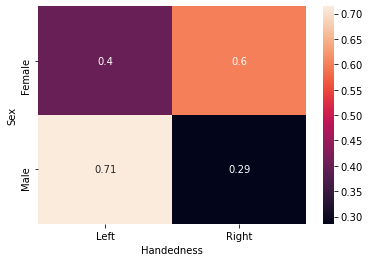

In [44]:
sns.heatmap(pd.crosstab(df.Sex, df.Handedness, normalize="index"), annot=True)

In [42]:
df = pd.read_csv("https://bit.ly/drinksbycountry").head(10) 

<AxesSubplot:xlabel='continent', ylabel='country'>

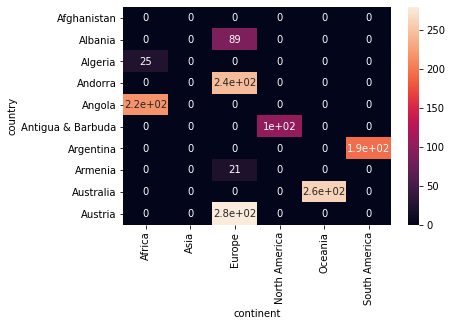

In [43]:
sns.heatmap(pd.crosstab(df.country, df.continent, values=df.beer_servings, aggfunc=np.sum).fillna(0), annot=True)


In [15]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


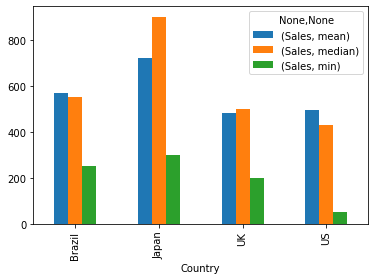